In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

In [4]:
import numpy as np
import tqdm
import torch
from torch import optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm_
import sys

# Loading data
train_ds = CHDataset("data/convex_hull_50_test.txt")
train_dl = DataLoader(train_ds, num_workers=2, batch_size=1024) 

# Init model
model = PointerNet("LSTM", True, 1, 2, 128, 0.0)
criterion = PointerNetLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

model = model.cuda()

# Training
for epoch in range(200):
    model.train()
    total_loss = 0.
    batch_cnt = 0.
    for data, target in train_dl:
        data = [i.cuda() for i in data]
        target = [i.cuda() for i in target]
        
        optimizer.zero_grad()
        align_score = model(*data)
        loss = criterion(align_score, *target)

        l = loss.item()
        total_loss += l
        batch_cnt += 1

        loss.backward()
        clip_grad_norm_(model.parameters(), 5.)
        optimizer.step()
        
    print("Epoch : {}, loss {}".format(epoch, total_loss / batch_cnt))

Max Input Length 50
Max Output Length 18
Epoch : 0, loss 3.77783887386322
Epoch : 1, loss 3.2888227224349977
Epoch : 2, loss 2.5471121072769165
Epoch : 3, loss 1.9616286516189576
Epoch : 4, loss 1.580298364162445
Epoch : 5, loss 1.3412872433662415
Epoch : 6, loss 1.1527705669403077
Epoch : 7, loss 1.044444054365158
Epoch : 8, loss 0.9519232451915741
Epoch : 9, loss 0.8851219296455384
Epoch : 10, loss 0.8433300733566285
Epoch : 11, loss 0.7800188899040222
Epoch : 12, loss 0.7401944756507873
Epoch : 13, loss 0.7007140278816223
Epoch : 14, loss 0.6671462655067444
Epoch : 15, loss 0.6422415196895599
Epoch : 16, loss 0.6192421436309814
Epoch : 17, loss 0.5966367781162262
Epoch : 18, loss 0.5772657036781311
Epoch : 19, loss 0.5603267192840576
Epoch : 20, loss 0.5486321866512298
Epoch : 21, loss 0.5328665375709534
Epoch : 22, loss 0.5189068555831909
Epoch : 23, loss 0.5074101775884629
Epoch : 24, loss 0.49434184432029726
Epoch : 25, loss 0.4827824145555496
Epoch : 26, loss 0.4724316895008087


In [8]:
(a, b, c), (d, e) = next(iter(train_dl))
print(a.shape, b.shape, c.shape, d.shape, e.shape, e[0, 0])
out = model(a.cuda(),b.cuda(),c.cuda())

torch.Size([1024, 51, 2]) torch.Size([1024, 1]) torch.Size([1024, 19, 2]) torch.Size([1024, 19]) torch.Size([1024, 1]) tensor(13)


In [9]:
a = a[0]
print(a.shape)

torch.Size([51, 2])


In [10]:
d = d[0]

In [11]:
d

tensor([ 2, 36, 38, 48, 50,  7,  3,  5, 25, 18, 13,  2,  0,  0,  0,  0,  0,  0,
         0])

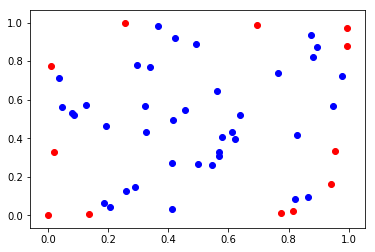

In [16]:
for i in range(len(a)):
    if i in d:
        plt.scatter(a[i][0], a[i][1], color='red')
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()

In [13]:
out = out[0]

In [15]:
c = out.argmax(-1)
print(c)

tensor([ 2, 36, 38, 48, 50,  7,  3,  5, 25, 18, 13,  2,  0,  0,  0,  0,  0,  0,
         0], device='cuda:0')


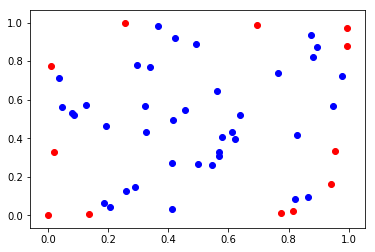

In [17]:
for i in range(len(a)):
    if i in d:
        plt.scatter(a[i][0], a[i][1], color='red')
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()

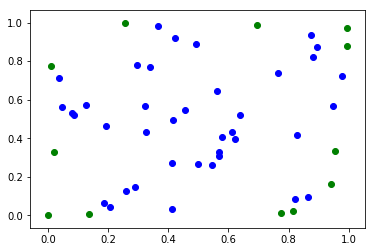

In [18]:
for i in range(len(a)):
    if i in c:
        plt.scatter(a[i][0], a[i][1], color='green')
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()